# Example of Jupyter notebook reading images
Notebook showing how to read and visualize images coming in different formats

## Load packages

In [47]:
import numpy as np
import matplotlib.pyplot as plt

import imageio as io

## Reading a standard image
Here we use the `imageio` package for reading an image. Other options exist, for example: `open-cv`

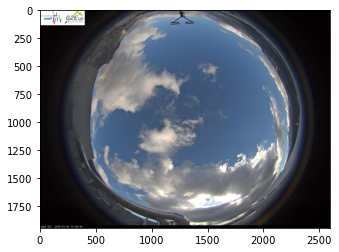

In [48]:
img = io.imread('../docs/figs/cam2_UTC_19-01-02_10-59-59-84.jpg')

plt.imshow(img)

## Reading a remote sensing image
`imageio` can read also images that are not coded in 8 bits.

In [49]:
# Helper functions for printing image information 
# Add src directory for being able to import its content
import sys  
sys.path.append("../src/")  

# Import from a file in the src folder
from utils_gdal import gdal_img_info
from utils_rasterio import rio_img_info

gdal_img_info("data/example_geotiff_1band.tif")
rio_img_info("data/example_geotiff_1band.tif")

name: data/example_geotiff_1band.tif
type: <class 'osgeo.gdal.Dataset'>
projection: PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",44],PARAMETER["standard_parallel_2",49],PARAMETER["latitude_of_origin",46.5],PARAMETER["central_meridian",3],PARAMETER["false_easting",700000],PARAMETER["false_northing",6600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
dtype: Float32
height: 400, width: 320, bands: 1
x_res: 250.0, y_res: -250.0
bounds: ((5.563372339959362, 45.57520973694103, 0.0), (6.530823801939659, 44.647681836128385, 0.0))
metadata: {'AREA_OR_POINT': 'Area', 'TIFFTAG_SOFTWARE': 'MATLAB 8.1, Mapping Toolbox 3.7'}


name: data/example_geotiff_1band.tif
projection: PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.01745

(400, 320)
float32


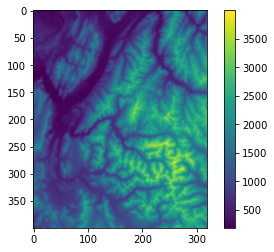

In [50]:
# Example of reading an image not coded on 8 bits (here float32)

filename1 = "./data/example_geotiff_1band.tif"
img1 = io.imread(filename1)

print(img1.shape)
print(img1.dtype)

# This is a scalar image with floating point values coded on 32 bits
plt.imshow(img1)
plt.colorbar()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(400, 320, 7)
float32
(nan, nan)


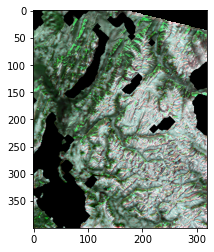

In [51]:
# Example of reading a multispectral image with 7 bands
filename2 = "./data/example_geotiff_ms.tif"

img2 = io.imread(filename2)

print(img2.shape)
print(img2.dtype)
print((img2.min(), img2.max()))

# Visualize an arbitrary combination of 3 bands as a color image
plt.imshow(img2[:,:,(2,1,0)])
plt.show()


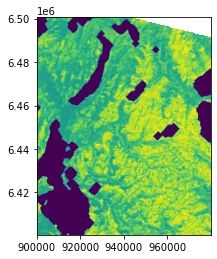

name: ./data/example_geotiff_ms.tif
projection: PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["unknown",SPHEROID["unnamed",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",46.5],PARAMETER["central_meridian",3],PARAMETER["standard_parallel_1",44],PARAMETER["standard_parallel_2",49],PARAMETER["false_easting",700000],PARAMETER["false_northing",6600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
dtype: float32
height: 400, width: 320, bands: 7
x_res: 250.0, y_res: 250.0
bounds: BoundingBox(left=899883.2285598996, bottom=6400545.207743676, right=979883.2285598996, top=6500545.207743676) 
 



In [55]:
# Do the same using rasterio (note that the pixel coordinates are expressed in a coordinate reference system (lat, lon))
import rasterio
from rasterio.plot import show
img = rasterio.open(filename2)
# For visualizing an image, use `show` from rasterio
show(img)   

rio_img_info(filename2)

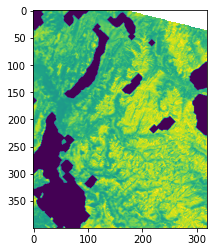

In [53]:
# Use gdal for loading an image and matplotlit for visualize it
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open(filename2, gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
# Get an numpy array 
arr = band.ReadAsArray()

# Being a numpy array, it is possible to visualize it with matplotlib
plt.imshow(arr)
plt.show()

## Reading a Matlab workspace

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 27 14:43:18 2016', '__version__': '1.0', '__globals__': [], 'Eem': array([[0.804 , 0.6462, 0.5913, 0.3998, 0.1001, 0.1681, 0.029 , 0.0512],
       [0.6504, 0.6008, 0.5174, 0.2887, 0.1053, 0.1836, 0.172 , 0.3741],
       [0.8182, 0.6659, 0.5064, 0.4211, 0.1012, 0.1744, 0.0352, 0.0394],
       [0.8341, 0.6726, 0.5677, 0.4349, 0.1024, 0.1277, 0.0342, 0.0623],
       [0.1424, 0.2123, 0.1869, 0.0674, 0.1031, 0.1029, 0.1978, 0.4112],
       [0.0239, 0.051 , 0.0322, 0.0255, 0.0844, 0.1383, 0.0993, 0.2363],
       [0.0155, 0.0619, 0.0182, 0.0207, 0.0957, 0.1318, 0.0428, 0.1078]])}
dict_keys(['__header__', '__version__', '__globals__', 'Eem'])


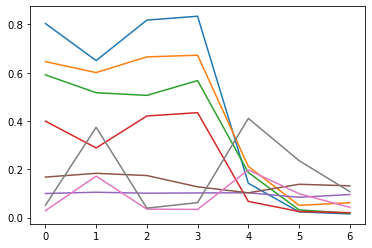

In [54]:
from scipy.io import loadmat
data = loadmat('./data/example_matlab_workspace.mat') 
print(data)

# Have a look at the content of a dictionary 
print(data.keys())

# Extract the data of interest by accessing the dictionary by its key.
Eem = data['Eem']
# Plot the data
plt.plot(Eem)
plt.show()